In [1]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


import pypsa_helpers as ph
import importlib


ph = importlib.reload(ph)


## Setting up nodes and building sample network

In [2]:
demand_nodes=pd.read_csv("../4_real_map_cleaned/demand_estimates.csv")
distrib_nodes = pd.read_csv("../4_real_map_cleaned/supply_estimates.csv")

In [3]:
demand_nodes=demand_nodes[["cluster_id","x_km_shift", "y_km_shift", 'scaled_demand']].iloc[:-1]
demand_nodes["cluster_id"] = demand_nodes["cluster_id"].astype(float).astype(int)
distrib_nodes=distrib_nodes[["node_id", "node_type", "x_km_shift", "y_km_shift", "scaled_supply"]]

In [4]:
demand_nodes["loc"] = list(zip(demand_nodes["x_km_shift"], demand_nodes["y_km_shift"]))
demand_nodes["load"] = demand_nodes["scaled_demand"]
demand_nodes["p_nom_combustion"] = 1000
demand_nodes["combustion_efficiency"]=0.22

distrib_nodes["loc"] = list(zip(distrib_nodes["x_km_shift"], distrib_nodes["y_km_shift"]))


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 1.05e+03
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.


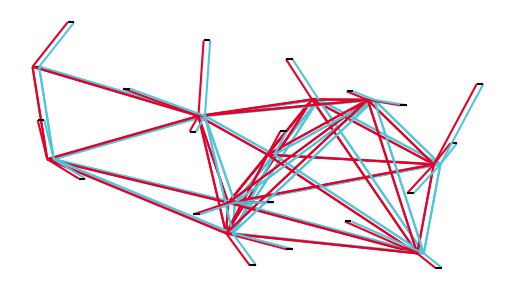

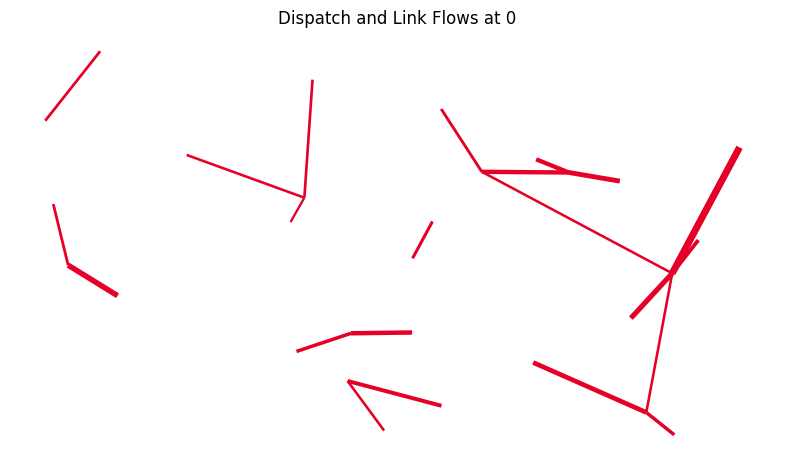

In [5]:
n=ph.build_network(distribution_nodes=distrib_nodes, load_nodes=demand_nodes, plotbool=True,link_radius2=4000000)

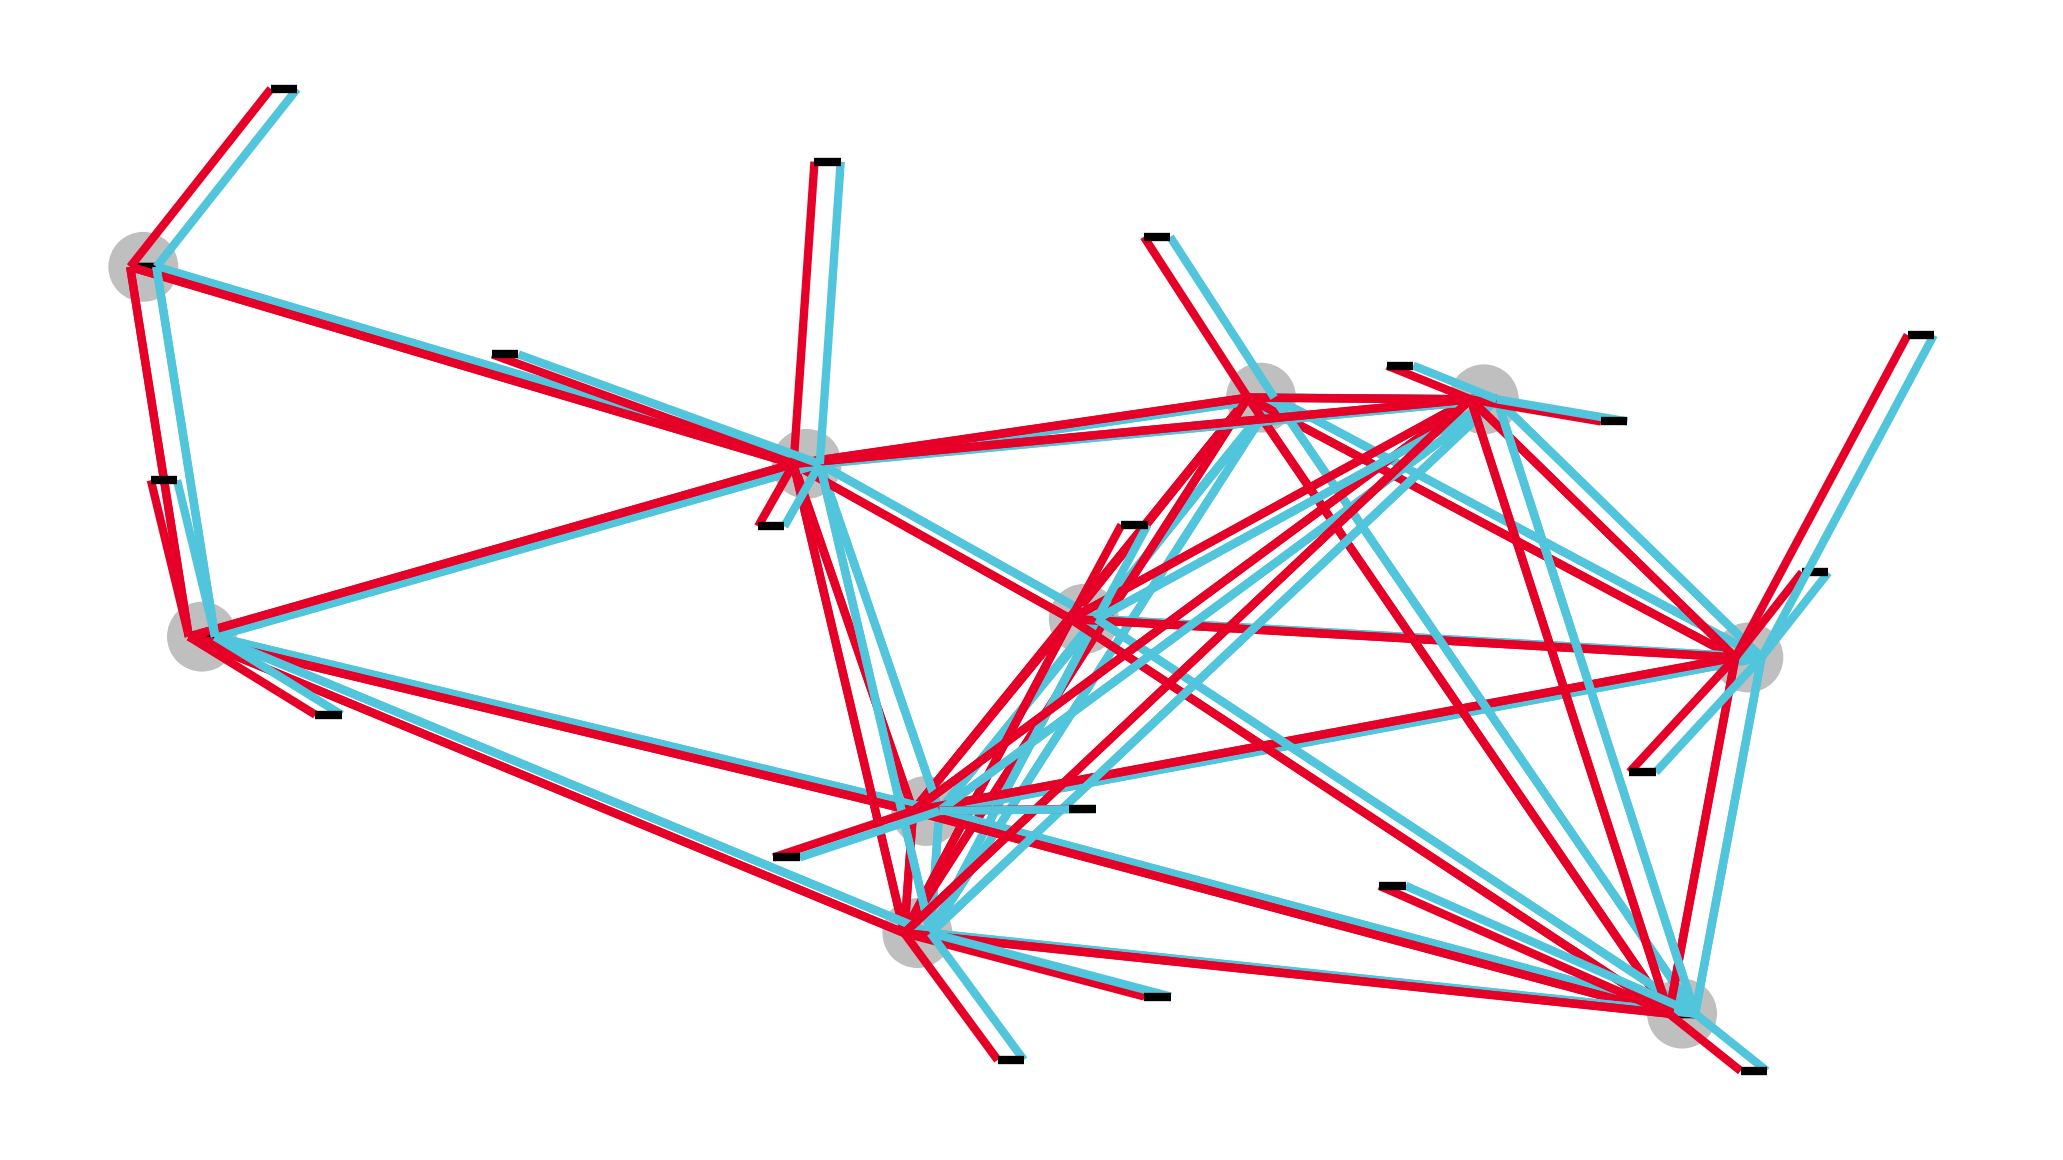

In [6]:
ph.plot_network_schematic(n)

## Sweeping over RTEs and transmission efficiencies to create main dataset

In [8]:
alpha_e_min = 3e-5
alpha_e_max = 1e-4
alpha_e_avg = np.average([alpha_e_max, alpha_e_min])

alpha_c_min = 5e-6
alpha_c_max = 1e-5
alpha_c_avg = np.average([alpha_c_max, alpha_c_min])
RTEs = [0.5, 0.6, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.95, 0.99]

In [9]:
df_fuel_favored=[]
for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=5.5,      # something you suspect is too small
                    alpha_high=6,     # you know this works
                    tol=0.1,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_max,
                        fuel_line_loss_decay=alpha_c_min,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=True,
                        num_days=30,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_fuel_favored.append({
        'network':n,
        'electric_decay':1e-4,
        'fuel_decay':5e-6,
        'RTE':RTE,
        'alpha':alpha,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_fuel_favored=pd.DataFrame(df_fuel_favored)
                    

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 252.31it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.83e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 406.93it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<?, ?it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.75e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 249.56it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Terminati

Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 199.75it/s]
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.69e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 239.03it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 232.83it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.68e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 519.35it/s]
INFO:linopy.io: Writing time: 0.23s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 286.31it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.67e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 174.65it/s]
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 402.28it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.66e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 210.21it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 262.40it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.65e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 212.53it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 266.38it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.64e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 249.05it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 269.49it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.63e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 197.45it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 332.99it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.62e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 205.53it/s]
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 224.41it/s]
INFO:linopy.io: Writing time: 0.27s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.60e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 105.55it/s]
INFO:linopy.io: Writing time: 0.37s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 194.96it/s]
INFO:linopy.io: Writing time: 0.35s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.57e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 210.52it/s]
INFO:linopy.io: Writing time: 0.35s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 271.31it/s]
INFO:linopy.io: Writing time: 0.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.54e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 211.08it/s]
INFO:linopy.io: Writing time: 0.29s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 5.5625
Best alpha:  5.5625


In [11]:
df_elec_favored=[]
for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=4.5,      # something you suspect is too small
                    alpha_high=6,     # you know this works
                    tol=0.1,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_min,
                        fuel_line_loss_decay=2e-5,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=True,
                        num_days=30,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_elec_favored.append({
        'network':n,
        'RTE':RTE,        
        'electric_decay':3e-5,
        'fuel_decay':2e-5,
        'alpha':alpha,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_elec_favored=pd.DataFrame(df_elec_favored)          

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 494.09it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.72e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 267.59it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.7812
Best alpha:  4.78125


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 1280.70it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.65e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 944.77it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 229.53it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.60e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 143.42it/s]
INFO:linopy.io: Writing time: 0.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 717.19it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.59e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 485.24it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 199.11it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.58e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 397.54it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 402.91it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.57e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 1519.40it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 529.02it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.56e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 248.55it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 395.94it/s]
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.55e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 395.06it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 465.66it/s]
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.55e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 159.57it/s]
INFO:linopy.io: Writing time: 0.25s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 349.97it/s]
INFO:linopy.io: Writing time: 0.24s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.54e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 283.81it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 361.84it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.53e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 234.18it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 198.33it/s]
INFO:linopy.io: Writing time: 0.25s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.52e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 333.17it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 199.37it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.51e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 1257.76it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


In [29]:
df_mid=[]
for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=4.5,      # something you suspect is too small
                    alpha_high=6,     # you know this works
                    tol=0.1,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_avg,
                        fuel_line_loss_decay=alpha_c_avg,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=True,
                        num_days=30,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_mid.append({
        'network':n,
        'RTE':RTE,        
        'electric_decay':alpha_e_avg-5,
        'fuel_decay':alpha_c_avg,
        'alpha':alpha,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_mid=pd.DataFrame(df_mid)    

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 253.03it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.77e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 285.43it/s]
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.8750
Best alpha:  4.875


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 399.08it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.70e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 710.72it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Te

Minimum feasible supplyscale α* ≈ 4.6875
Best alpha:  4.6875


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 395.98it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.64e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 376.64it/s]
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 267.09it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.63e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 543.78it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 408.88it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.62e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 216.98it/s]
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 213.79it/s]
INFO:linopy.io: Writing time: 0.24s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.61e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 289.53it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 199.56it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.60e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 207.64it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 564.32it/s]
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.60e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 313.61it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 355.36it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.59e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 612.96it/s]
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 480.09it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.58e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 228.27it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 383.09it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.57e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 248.00it/s]
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 302.07it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.55e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 200.41it/s]
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok


Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 313.43it/s]
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.52e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 328.62it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 4.5938
Best alpha:  4.59375


In [19]:
df_fuel_favored_static=[]

for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=2,      # something you suspect is too small
                    alpha_high=2.8,     # you know this works
                    tol=0.05,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_max,
                        fuel_line_loss_decay=alpha_c_min,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=False,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_fuel_favored_static.append({
        'network':n,
        'RTE':RTE, 
        'alpha':alpha,
        'electric_decay':1e-4,
        'fuel_decay':5e-6,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_fuel_favored_static=pd.DataFrame(df_fuel_favored_static)

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.2000
Best alpha:  2.2


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.91e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.98e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1500
Best alpha:  2.1500000000000004


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.90e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.95e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1500
Best alpha:  2.1500000000000004


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.86e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.89e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1250
Best alpha:  2.125


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.80e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.83e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1250
Best alpha:  2.125


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.69e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.71e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.57e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.58e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


In [20]:
df_elec_favored_static=[]

for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=2,      # something you suspect is too small
                    alpha_high=2.8,     # you know this works
                    tol=0.05,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_min,
                        fuel_line_loss_decay=2e-5,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=False,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_elec_favored_static.append({
        'network':n,
        'alpha':alpha,
        'RTE':RTE, 
        'electric_decay':3e-5,
        'fuel_decay':2e-5,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_elec_favored_static=pd.DataFrame(df_elec_favored_static)

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.40e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.37e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.38e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


In [30]:
df_mid_static=[]

for RTE in RTEs:
    alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=2,      # something you suspect is too small
                    alpha_high=2.8,     # you know this works
                    tol=0.05,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=alpha_e_avg,
                        fuel_line_loss_decay=alpha_c_avg,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=False,
                    ),
                )
    print("Best alpha: ", alpha)
    
    df_mid_static.append({
        'network':n,
        'alpha':alpha,
        'RTE':RTE, 
        'electric_decay':alpha_e_avg,
        'fuel_decay':alpha_c_avg,
        'fuel-km pct': ph.fuel_km_metrics(n)[1],
        'shortest-fuel-line': ph.min_fuel_transmission_distance(n)
    })
df_mid_static=pd.DataFrame(df_mid_static)

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.68e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.1000
Best alpha:  2.1


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.63e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.67e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0750
Best alpha:  2.075


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.55e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.57e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.46e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 207 primals, 472 duals
Objective: 8.46e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.0500
Best alpha:  2.05


In [132]:
ph = importlib.reload(ph)
# compute the metric for each scenario in each dataframe
for df in [
    df_elec_favored_static,
    df_fuel_favored_static,
    df_mid_static,
    df_elec_favored,
    df_fuel_favored,
    df_mid,
]:
    df["longest-elec-line"] = df["network"].apply(ph.max_electric_transmission_distance_dnodes)


rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected
rejected


In [ ]:
df_elec_favored["Storage"] = True
df_fuel_favored["Storage"] = True
df_mid["Storage"] = True
df_elec_favored_static["Storage"] = False
df_fuel_favored_static["Storage"] = False
df_mid_static["Storage"] = False
total_df=pd.concat([df_elec_favored_static, df_fuel_favored_static,df_elec_favored,df_fuel_favored,df_mid, df_mid_static  ], ignore_index=True)
#total_df.drop(columns='network').to_excel("results_df.xlsx", index=False)

In [6]:
total_df = pd.read_excel("results_df.xlsx")
#total_df=pd.concat([total_df, df_elec_favored_static, df_fuel_favored_static,df_elec_favored,df_fuel_favored  ], ignore_index=True)
total_df.head()

,alpha,RTE,electric_decay,fuel_decay,fuel-km pct,shortest-fuel-line,Storage,longest-elec-line
0,2.05,0.500,0.00003,0.00002,0.0,NaN,False,NaN
1,2.05,0.600,0.00003,0.00002,0.0,NaN,False,NaN
2,2.05,0.700,0.00003,0.00002,0.0,NaN,False,NaN
3,2.05,0.725,0.00003,0.00002,0.0,NaN,False,NaN
4,2.05,0.750,0.00003,0.00002,0.0,NaN,False,NaN


In [10]:
total_df["hue_pair"] = total_df["fuel_decay"].astype(str) + "_" + total_df["Storage"].astype(str)
# Define mapping from hue_pair → new dataframe name
split_map = {
    "2e-05_False": "df_elec_favored_static",
    "7.500000000000001e-06_False": "df_mid_static",
    "5e-06_False": "df_fuel_favored_static",
    "2e-05_True": "df_elec_favored",
    "5e-06_True": "df_fuel_favored",
    "7.500000000000001e-06_True": "df_mid",
}

# Create the six dataframes
dfs = {name: total_df[total_df["hue_pair"] == key].copy()
       for key, name in split_map.items()}

# Unpack them into variables if desired
df_elec_favored_static = dfs["df_elec_favored_static"]
df_mid_static          = dfs["df_mid_static"]
df_fuel_favored_static = dfs["df_fuel_favored_static"]

df_elec_favored        = dfs["df_elec_favored"]
df_fuel_favored        = dfs["df_fuel_favored"]
df_mid                 = dfs["df_mid"]

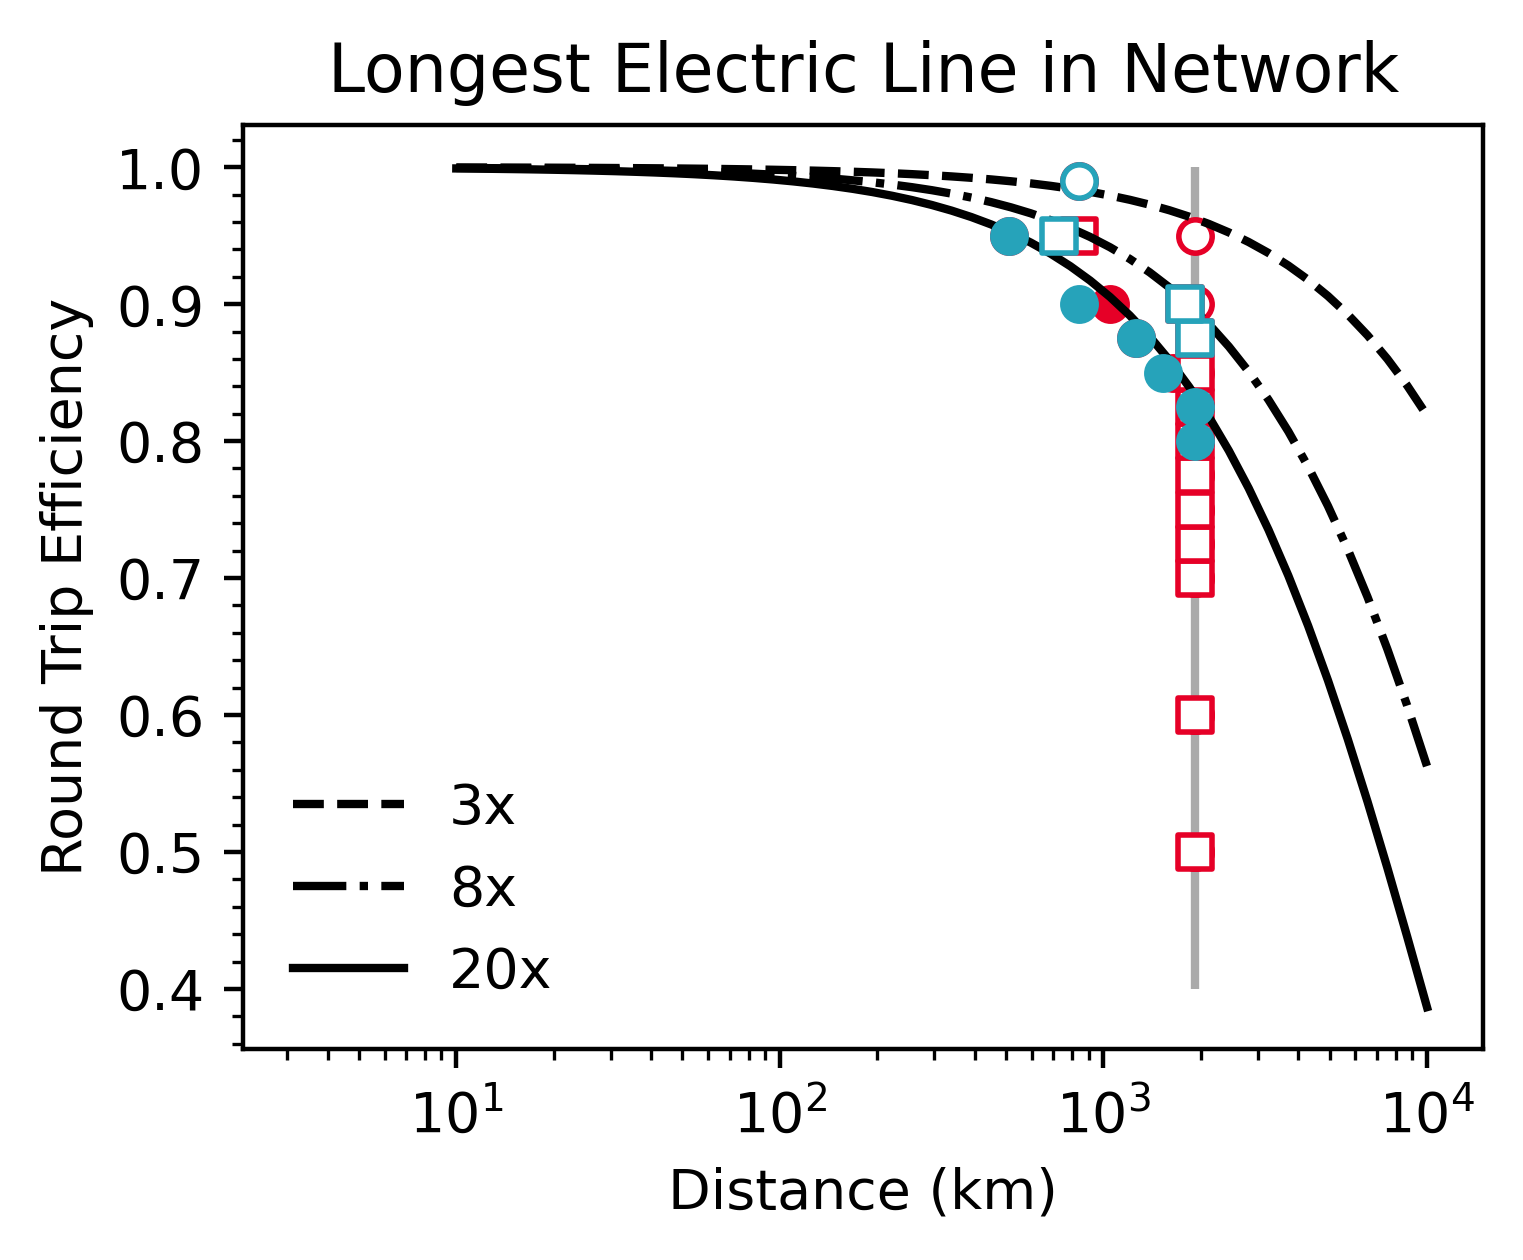

In [11]:
distances = np.logspace(1, 4)

electric_favored_ratio = (1-alpha_e_min)/(1-alpha_c_max)
fuel_favored_ratio = (1-alpha_e_max)/(1-alpha_c_min)

mib = (1-alpha_e_avg)/(1-alpha_c_avg)

plt.figure(figsize=(4, 3), dpi=400)
plt.plot(distances, np.exp(distances*np.log(electric_favored_ratio)), label="3x", color="black", linestyle="--")
plt.plot(distances, np.exp(distances*np.log(mib)), label="8x", color="black", linestyle="-." )
plt.plot(distances, np.exp(distances*np.log(fuel_favored_ratio)), label="20x", color="black")

plt.ylabel("Round Trip Efficiency")
plt.xlabel("Distance (km)")

# Static cases (blue)
plt.scatter(df_elec_favored_static["longest-elec-line"], RTEs, color="#26A3BA", facecolor="white", zorder=10)
plt.scatter(df_fuel_favored_static["longest-elec-line"], RTEs, color="#26A3BA", zorder=10)
plt.scatter(df_mid_static["longest-elec-line"], RTEs, color="#26A3BA", marker="s", facecolor="white", zorder=10)

# Optimized/dynamic cases (red)
plt.scatter(df_elec_favored["longest-elec-line"], RTEs, color="#E60027", facecolor="white")
plt.scatter(df_fuel_favored["longest-elec-line"], RTEs, color="#E60027")
plt.scatter(df_mid["longest-elec-line"], RTEs, color="#E60027", marker="s", facecolor="white")

plt.title("Longest Electric Line in Network")
plt.xscale('log')
plt.vlines(1913, 0.4, 1, zorder=-10, color="#AAAAAA")

# ── Make sure ticks and labels are ON ─────────────────────────────────
ax = plt.gca()
ax.tick_params(
    axis='both',
    which='both',
    bottom=True, top=False, left=True, right=False,
    labelbottom=True, labelleft=True
)
# Optional: turn minor ticks on to match your older style
ax.minorticks_on()
# ---------------------------------------------------------------------

plt.legend(frameon=False)


plt.grid(False)

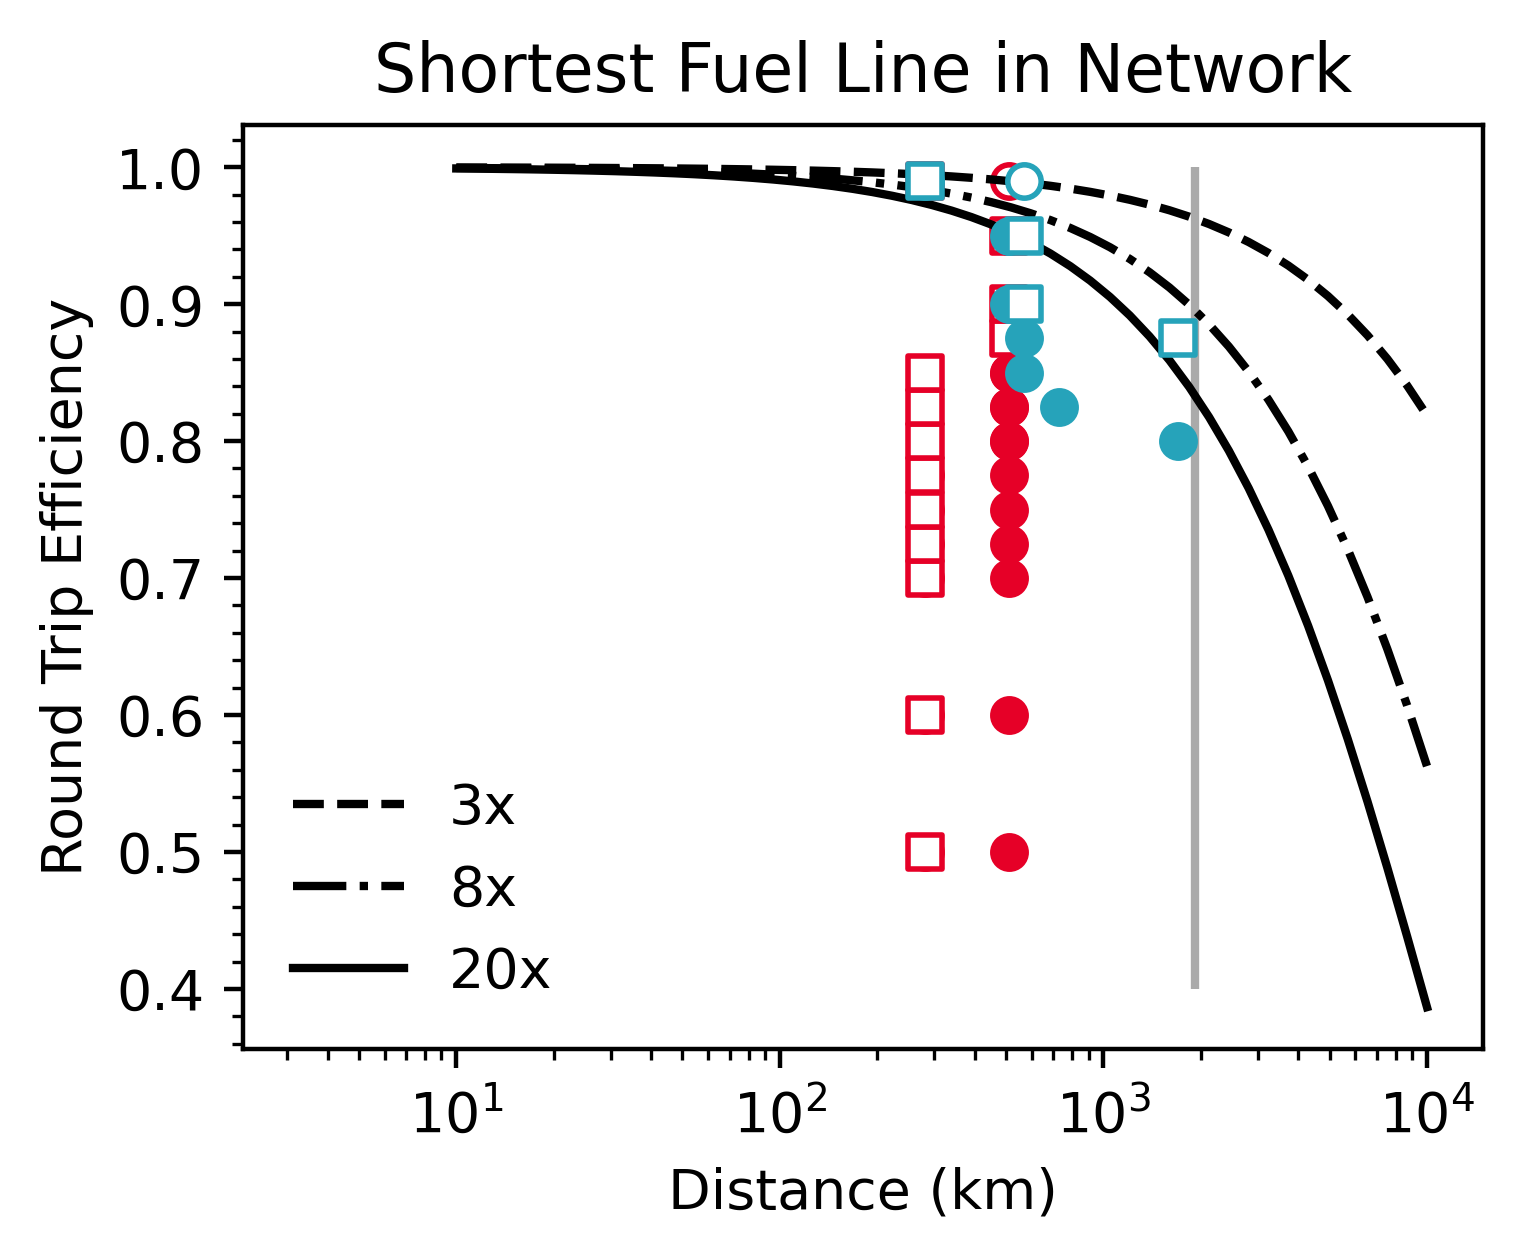

In [12]:
distances = np.logspace(1, 4)

electric_favored_ratio = (1-alpha_e_min)/(1-alpha_c_max)
fuel_favored_ratio = (1-alpha_e_max)/(1-alpha_c_min)

mib = (1-alpha_e_avg)/(1-alpha_c_avg)

plt.figure(figsize=(4, 3), dpi=400)
plt.plot(distances, np.exp(distances*np.log(electric_favored_ratio)), label="3x", color="black", linestyle="--")
plt.plot(distances, np.exp(distances*np.log(mib)), label="8x", color="black", linestyle="-." )
plt.plot(distances, np.exp(distances*np.log(fuel_favored_ratio)), label="20x", color="black")

plt.ylabel("Round Trip Efficiency")
plt.xlabel("Distance (km)")

# Static cases (blue)
plt.scatter(df_elec_favored_static["shortest-fuel-line"], RTEs, color="#26A3BA", facecolor="white", zorder=10)
plt.scatter(df_fuel_favored_static["shortest-fuel-line"], RTEs, color="#26A3BA", zorder=10)
plt.scatter(df_mid_static["shortest-fuel-line"], RTEs, color="#26A3BA", marker="s", facecolor="white", zorder=10)

# Optimized/dynamic cases (red)
plt.scatter(df_elec_favored["shortest-fuel-line"], RTEs, color="#E60027", facecolor="white")
plt.scatter(df_fuel_favored["shortest-fuel-line"], RTEs, color="#E60027")
plt.scatter(df_mid["shortest-fuel-line"], RTEs, color="#E60027", marker="s", facecolor="white")

plt.title("Shortest Fuel Line in Network")
plt.xscale('log')
plt.vlines(1913, 0.4, 1, zorder=-10, color="#AAAAAA")

# ── Make sure ticks and labels are ON ─────────────────────────────────
ax = plt.gca()
ax.tick_params(
    axis='both',
    which='both',
    bottom=True, top=False, left=True, right=False,
    labelbottom=True, labelleft=True
)
# Optional: turn minor ticks on to match your older style
ax.minorticks_on()
# ---------------------------------------------------------------------

plt.legend(frameon=False)


plt.grid(False)

In [164]:
total_df["hue_pair"].unique()

array(['2e-05_False', '5e-06_False', '2e-05_True', '5e-06_True',
       '7.500000000000001e-06_True', '7.500000000000001e-06_False'],
      dtype=object)

Text(0, 0.5, '% power-km as fuel')

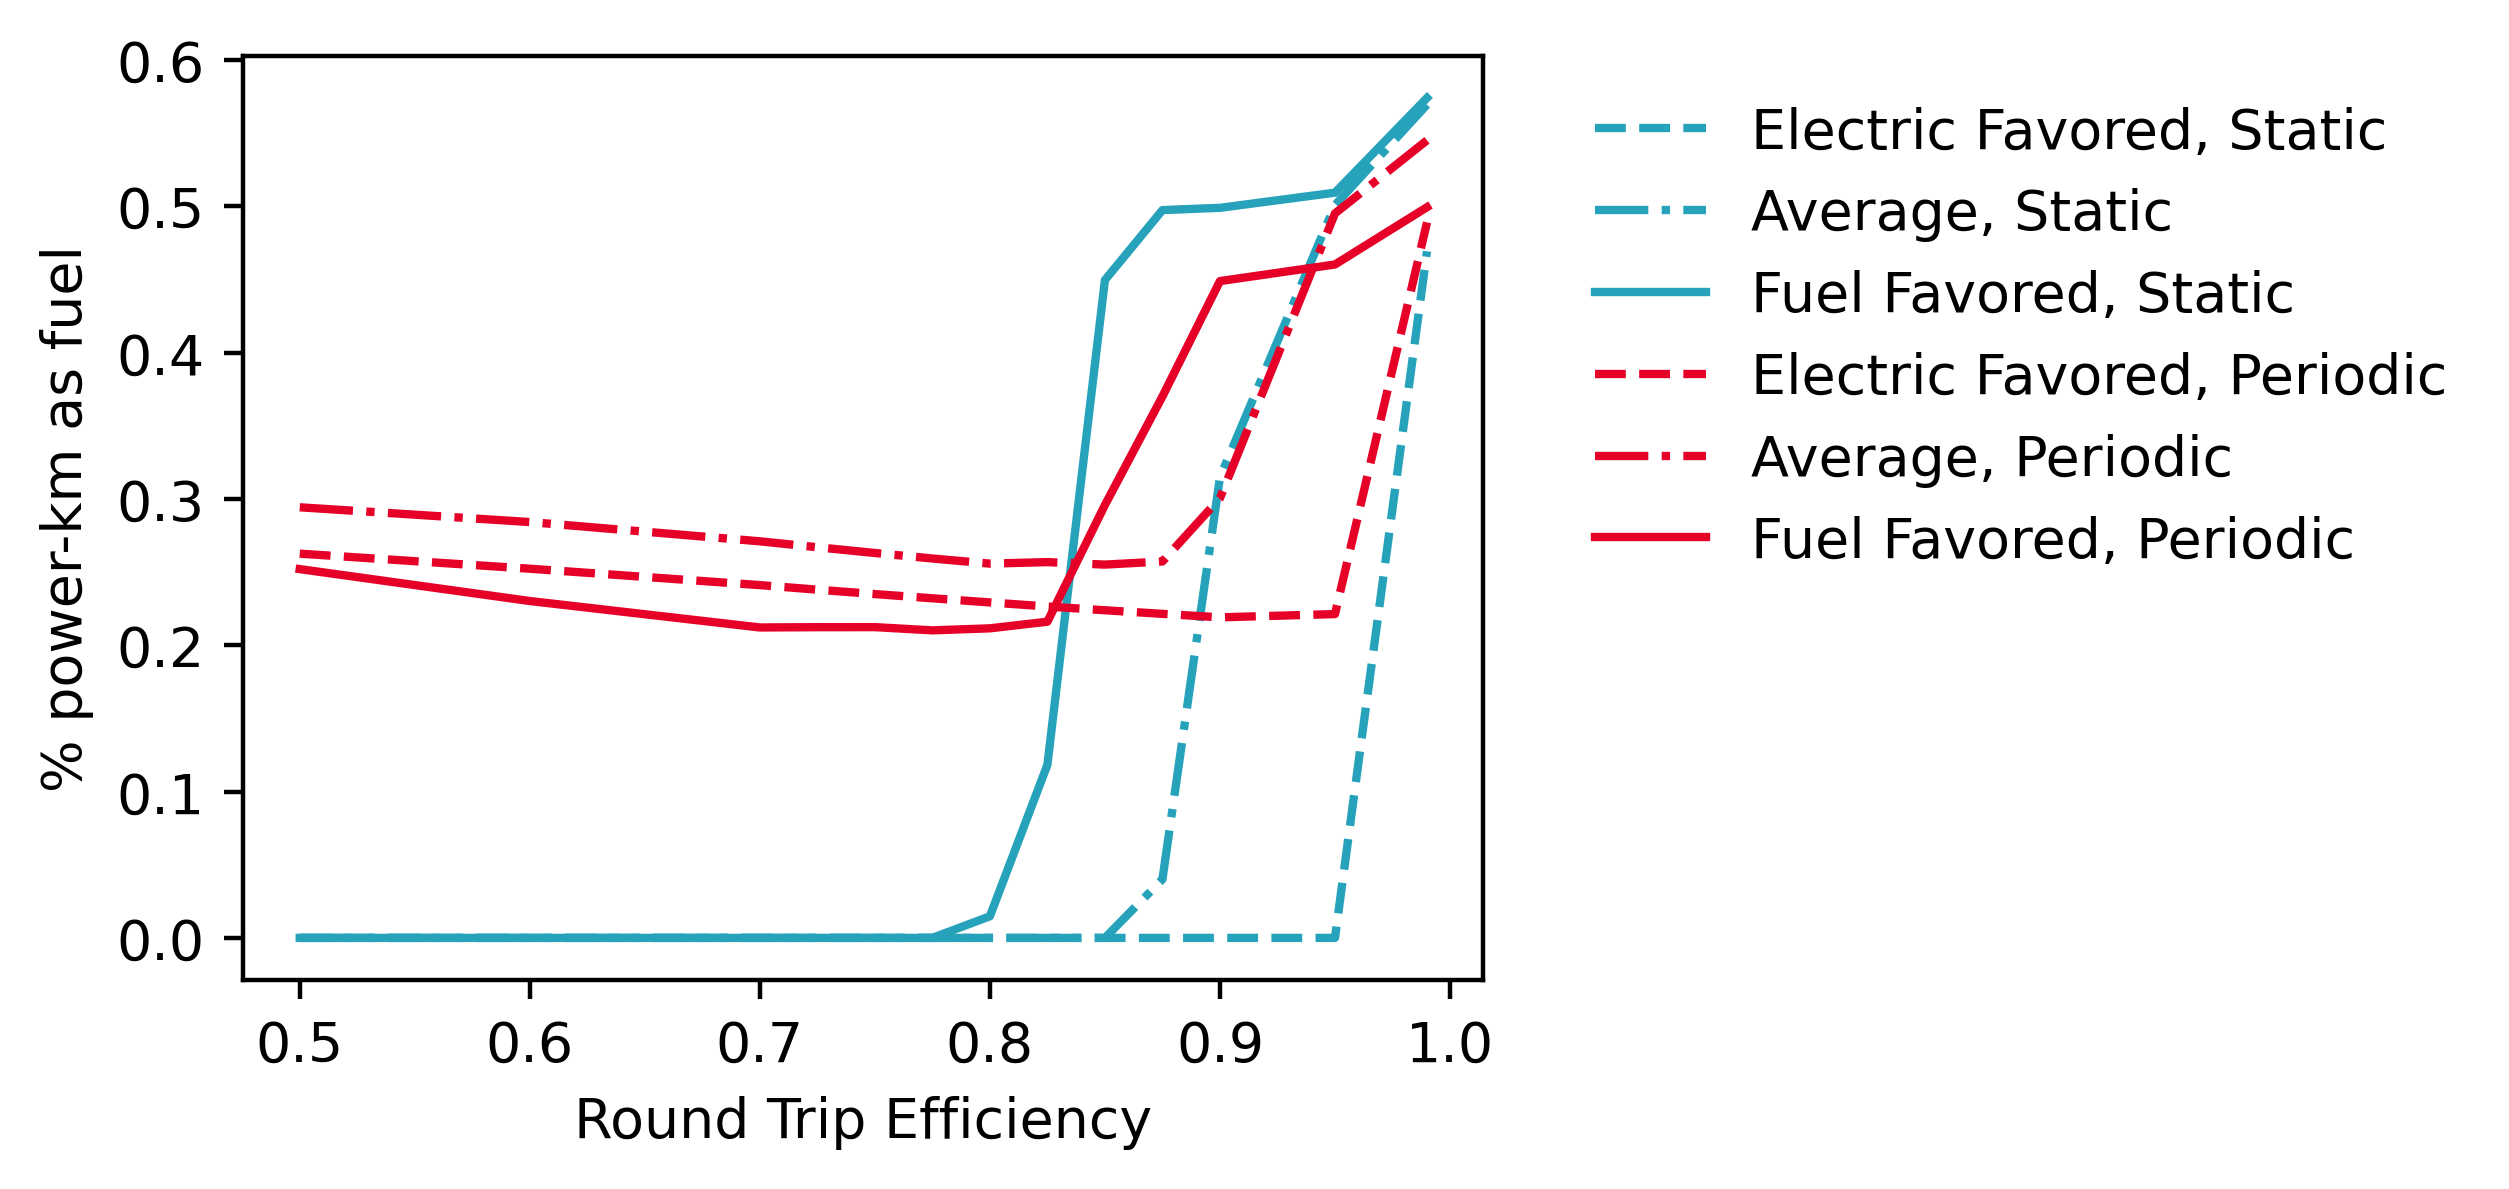

In [17]:
plt.figure(figsize=(4, 3), dpi=400)
total_df["hue_pair"] = total_df["fuel_decay"].astype(str) + "_" + total_df["Storage"].astype(str)

plt.plot(total_df[total_df["hue_pair"]=="2e-05_False"]['RTE'],
         total_df[total_df["hue_pair"]=="2e-05_False"]['fuel-km pct'],
         label="Electric Favored, Static",
         linestyle = "--",
         color='#26A3BA')
plt.plot(total_df[total_df["hue_pair"]=="7.500000000000001e-06_False"]['RTE'],
         total_df[total_df["hue_pair"]=="7.500000000000001e-06_False"]['fuel-km pct'],
         label="Average, Static",
         linestyle = "-.",
         color='#26A3BA')

plt.plot(total_df[total_df["hue_pair"]=="5e-06_False"]['RTE'],
         total_df[total_df["hue_pair"]=="5e-06_False"]['fuel-km pct'],
         label="Fuel Favored, Static",
         color='#26A3BA')

plt.plot(total_df[total_df["hue_pair"]=="2e-05_True"]['RTE'],
         total_df[total_df["hue_pair"]=="2e-05_True"]['fuel-km pct'],
         label="Electric Favored, Periodic",
         linestyle = "--",
         color='#E60027')

plt.plot(total_df[total_df["hue_pair"]=="7.500000000000001e-06_True"]['RTE'],
         total_df[total_df["hue_pair"]=="7.500000000000001e-06_True"]['fuel-km pct'],
         label="Average, Periodic",
         linestyle="-.",
         color='#E60027')
plt.plot(total_df[total_df["hue_pair"]=="5e-06_True"]['RTE'],
         total_df[total_df["hue_pair"]=="5e-06_True"]['fuel-km pct'],
         label="Fuel Favored, Periodic",
         
         color='#E60027')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.xlabel("Round Trip Efficiency")
plt.ylabel("% power-km as fuel")


## Plotting Network Schematics

In [61]:
RTE = 0.9
alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=2.5,      # something you suspect is too small
                    alpha_high=2.8,     # you know this works
                    tol=0.1,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=1e-4,
                        fuel_line_loss_decay=5e-6,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=False,
                    ),
                )

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 176 primals, 408 duals
Objective: 8.88e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io: Writing time: 0.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 176 primals, 408 duals
Objective: 8.89e+02
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper were

Minimum feasible supplyscale α* ≈ 2.6500


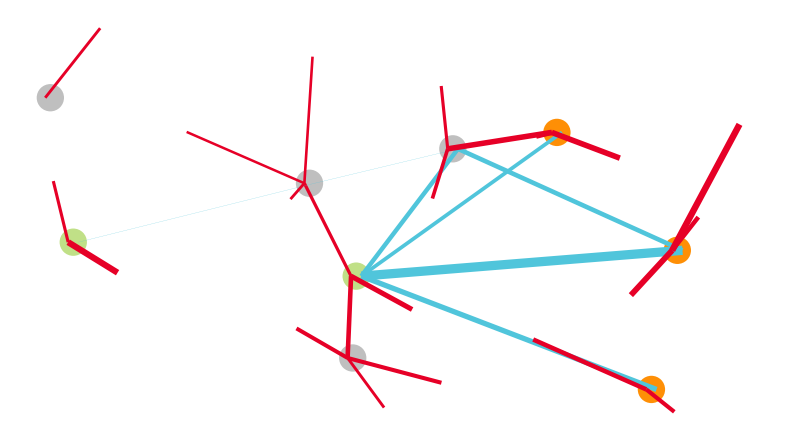

In [76]:
from matplotlib.patches import Circle

t = 0
ax = ph.plot_network(n, t)

plant_scale = 30
bus_coords = n.buses[["x", "y"]]

# snapshot + link flows (same as in your plot_network)
snapshot = n.snapshots[t]
flows = n.links_t.p0.loc[snapshot]   # MW
tol = 1e-3                           # tolerance for "non-zero" flow

mask = (
    bus_coords.index.to_series().astype(str).str.contains("DNode")
    & (n.buses["carrier"] == "CH4")
)
dnode_coords = bus_coords[mask]

comb_color = "#fe8f06"    # combustion active
elec_color = "#c0e087"    # electrolysis active
default_color = "black"   # neither active

for bus, row in dnode_coords.iterrows():
    # all links incident on this DNode
    links_here = n.links[(n.links.bus0 == bus) | (n.links.bus1 == bus)]
    idx = links_here.index

    if len(idx) == 0:
        face = default_color
    else:
        flows_here = flows.loc[idx]
        names_lower = idx.str.lower()

        has_comb = ((names_lower.str.contains("combustion")) &
                    (flows_here.abs() > tol)).any()
        has_elec = ((names_lower.str.contains("electrolysis")) &
                    (flows_here.abs() > tol)).any()

        if has_comb and has_elec:
            face = "#FFFFFF"
            alpha=0.25
        elif has_comb:
            face = comb_color
            alpha=1
        elif has_elec:
            face = elec_color
            alpha=1
        else:
            face = default_color
            alpha=0.25

    circ = Circle(
        (row["x"] - plant_scale, row["y"]),
        80,
        facecolor=face,
        edgecolor="none",
        alpha=alpha,
        zorder=0  # keep behind links; increase if you want on top
    )
    ax.add_patch(circ)


In [33]:

alpha, n = ph.search_min_supplyscale_bisection(
                    build_network_fn=ph.build_network,
                    distribution_nodes=distrib_nodes,
                    load_nodes=demand_nodes,
                    alpha_low=5,      # something you suspect is too small
                    alpha_high=6.3,     # you know this works
                    tol=0.1,
                    max_iter=30,
                    verbose=True,
                    build_kwargs=dict(
                        plotbool=False,           # turn off plotting during search
                        link_radius2=4000000,
                        electric_line_loss_decay=3e-5,
                        fuel_line_loss_decay=2e-5,
                        electrolysis_efficiency=np.sqrt(RTE),
                        combustion_efficiency=np.sqrt(RTE),
                        time_varying=True,
                        num_days=30,
                    ),
                )

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 408.09it/s]
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40860 primals, 88560 duals
Objective: 1.51e+05
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 224.01it/s]
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
T

Minimum feasible supplyscale α* ≈ 5.0812


(<Axes: xlabel='Day', ylabel='Stored energy (MWh)'>,
 <Axes: ylabel='Power (MW)'>)

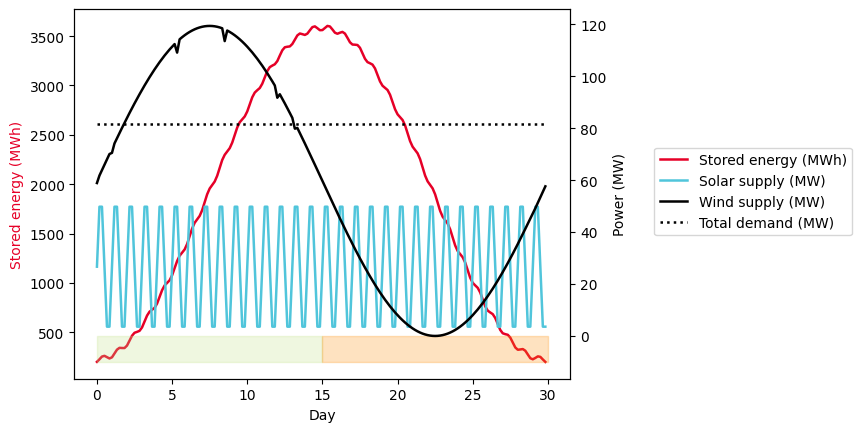

In [107]:
ph = importlib.reload(ph)
ph.plot_system_timeseries_dualaxis(n)
